In [1]:
import numpy as np
from compass.model import CompassModel
from compass.parameters import FLAGS
import random
from datetime import datetime
import seaborn as sns
import pandas as pd
import tracemalloc

random.seed(3)
np.random.seed(3)

# Initialize
FLAGS.max_res_steps = 50
FLAGS.max_school_steps = 50
FLAGS.conv_threshold = 0
FLAGS.window_size = 30
FLAGS.loglevel = "DEBUG"
FLAGS.case = 'lattice'
FLAGS.max_move_fraction = 0.05
FLAGS.verbose = False
FLAGS.random_residential = True

In [2]:
# Plots: runtime/memory vs. n_neighbourhoods
# Fixed size of grid and household density
# Increased number of schools
steps = [
    {"size": 100, "n_neighbourhoods": 25}, 
    {"size": 100, "n_neighbourhoods": 100}, 
    {"size": 100, "n_neighbourhoods": 225}, 
    {"size": 100, "n_neighbourhoods": 400}, 
    {"size": 100, "n_neighbourhoods": 625}, 
    {"size": 100, "n_neighbourhoods": 900}, 
]
runtime = []
memory = []

tracemalloc.start()
for i, s in enumerate(steps):
    print("step: %d" % i)
    FLAGS.n_neighbourhoods = FLAGS.n_schools = s["n_neighbourhoods"]
    FLAGS.width = FLAGS.height = s["size"]

    model = CompassModel(vars(FLAGS), export=False)
    start = datetime.now()
    tracemalloc.reset_peak()
    model.simulate()
    memory.append(tracemalloc.get_traced_memory()[1] / 1000000.0)
    runtime.append(datetime.now() - start)
    del model
tracemalloc.stop()

step: 0
step: 1


/home/jiqi/workspace/school-choice/compass/utils.py:646: RuntimeWarning: divide by zero encountered in log
  log_r_jm = np.nan_to_num(np.log(r_jm))


step: 2


/home/jiqi/workspace/school-choice/compass/utils.py:646: RuntimeWarning: divide by zero encountered in log
  log_r_jm = np.nan_to_num(np.log(r_jm))
/home/jiqi/workspace/school-choice/compass/utils.py:646: RuntimeWarning: divide by zero encountered in log
  log_r_jm = np.nan_to_num(np.log(r_jm))


step: 3


/home/jiqi/workspace/school-choice/compass/utils.py:646: RuntimeWarning: divide by zero encountered in log
  log_r_jm = np.nan_to_num(np.log(r_jm))


step: 4


/home/jiqi/workspace/school-choice/compass/utils.py:646: RuntimeWarning: divide by zero encountered in log
  log_r_jm = np.nan_to_num(np.log(r_jm))


step: 5


/home/jiqi/workspace/school-choice/compass/utils.py:646: RuntimeWarning: divide by zero encountered in log
  log_r_jm = np.nan_to_num(np.log(r_jm))


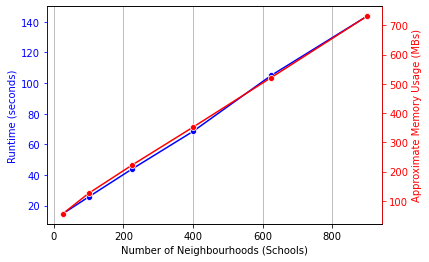

In [3]:
x = [s["n_neighbourhoods"] for s in steps]
y = [rt.total_seconds() for rt in runtime]
z = memory
df = pd.DataFrame(list(zip(x, y, z)), columns=["n_neighbourhoods", "runtime", "memory"])
ax = sns.lineplot(x="n_neighbourhoods", y="runtime", data=df, marker="o", color="b")
ax2 = ax.twinx()
sns.lineplot(x="n_neighbourhoods", y="memory", data=df, ax=ax2, color="r", marker="o")
ax.set_xlabel("Number of Neighbourhoods (Schools)")
ax.set_ylabel("Runtime (seconds)")
ax2.set_ylabel("Approximate Memory Usage (MBs)")
ax.yaxis.label.set_color("blue")
ax2.yaxis.label.set_color("red")
ax2.spines["left"].set_color("blue")
ax2.spines["right"].set_color("red")
ax.tick_params(axis="y", colors="blue")
ax2.tick_params(axis="y", colors="red")
ax.grid(axis="x")

In [2]:
# Plots: runtime/memory vs. n_households
# Fixed number of schools: 25
# Fixed household_density: 0.9
# Increased size of grid: range(70, 130, 10)
steps = [
    {"size": 100, "n_neighbourhoods": 25}, 
    {"size": 200, "n_neighbourhoods": 25}, 
    {"size": 300, "n_neighbourhoods": 25}, 
    {"size": 400, "n_neighbourhoods": 25}, 
    {"size": 500, "n_neighbourhoods": 25}, 
]
runtime = []
memory = []

tracemalloc.start()
for i, s in enumerate(steps):
    print("step: %d" % i)
    FLAGS.n_neighbourhoods = FLAGS.n_schools = s["n_neighbourhoods"]
    FLAGS.width = FLAGS.height = s["size"]

    model = CompassModel(vars(FLAGS), export=False)
    start = datetime.now()
    tracemalloc.reset_peak()
    model.simulate()
    memory.append(tracemalloc.get_traced_memory()[1] / 1000000.0)
    runtime.append(datetime.now() - start)
    del model
tracemalloc.stop()

step: 0
step: 1
step: 2
step: 3
step: 4


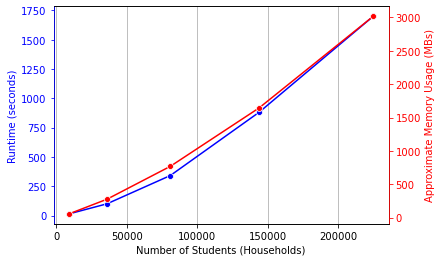

In [3]:
x = [s["size"]**2 * 0.9 for s in steps]
y = [rt.total_seconds() for rt in runtime]
z = memory
df = pd.DataFrame(list(zip(x, y, z)), columns=["n_neighbourhoods", "runtime", "memory"])
ax = sns.lineplot(x="n_neighbourhoods", y="runtime", data=df, marker="o", color="b")
ax2 = ax.twinx()
sns.lineplot(x="n_neighbourhoods", y="memory", data=df, ax=ax2, color="r", marker="o")
ax.set_xlabel("Number of Students (Households)")
ax.set_ylabel("Runtime (seconds)")
ax2.set_ylabel("Approximate Memory Usage (MBs)")
ax.yaxis.label.set_color("blue")
ax2.yaxis.label.set_color("red")
ax2.spines["left"].set_color("blue")
ax2.spines["right"].set_color("red")
ax.tick_params(axis="y", colors="blue")
ax2.tick_params(axis="y", colors="red")
ax.grid(axis="x")